# Customer Segmentation and Clustering
### Mall Customer Data for Marketing

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:/Users/rupam/Desktop/Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


# Univariate Analysis

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


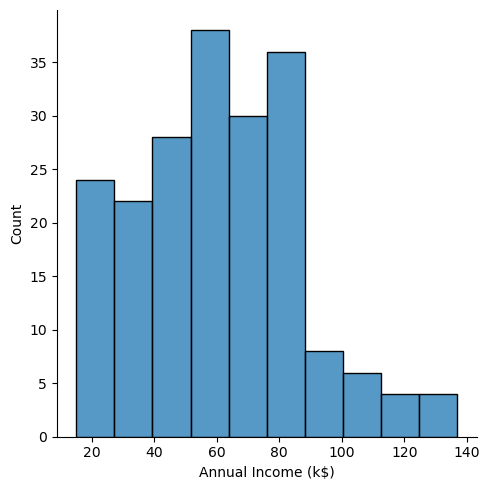

In [6]:
sns.displot(df['Annual Income (k$)'])

In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

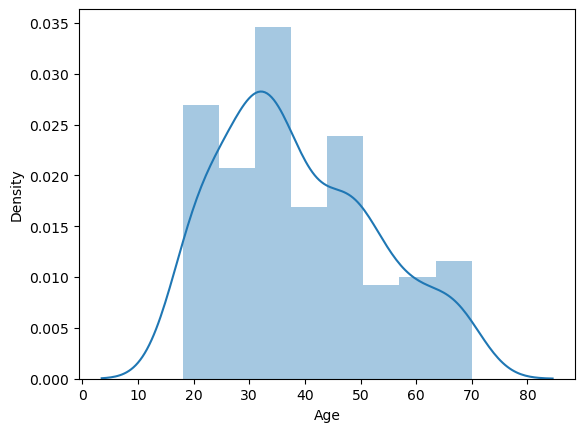

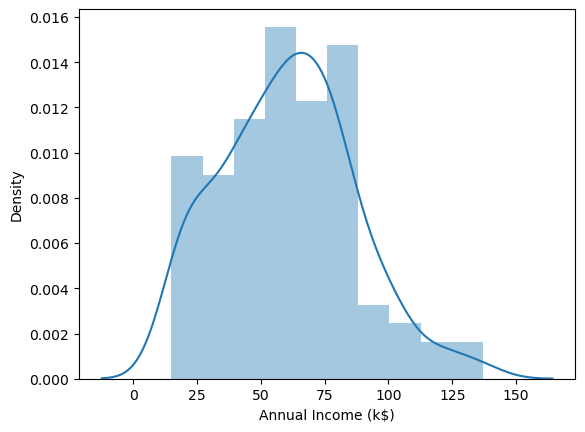

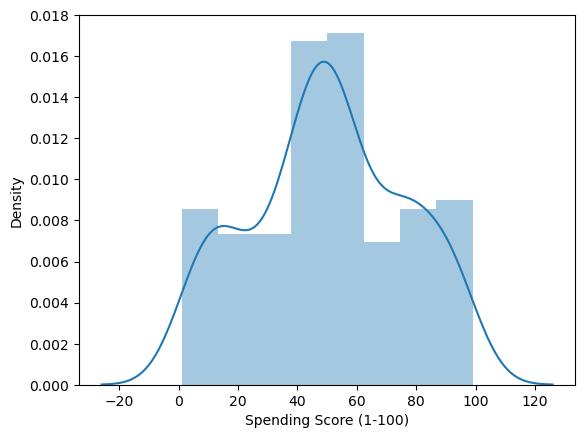

In [8]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure() # each time it runs it is going to create a new figure
    sns.distplot(df[i])

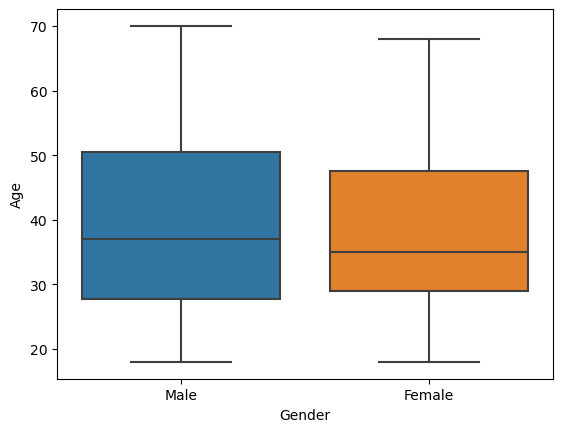

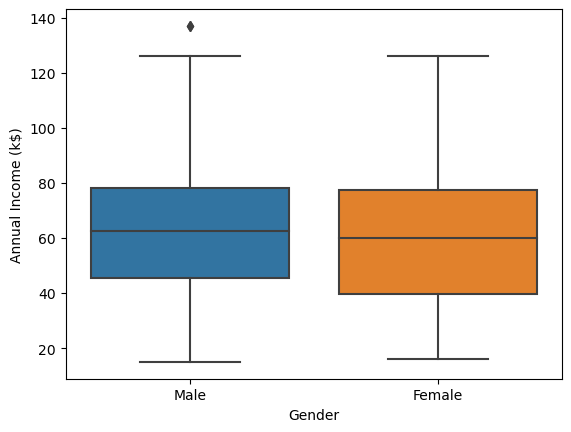

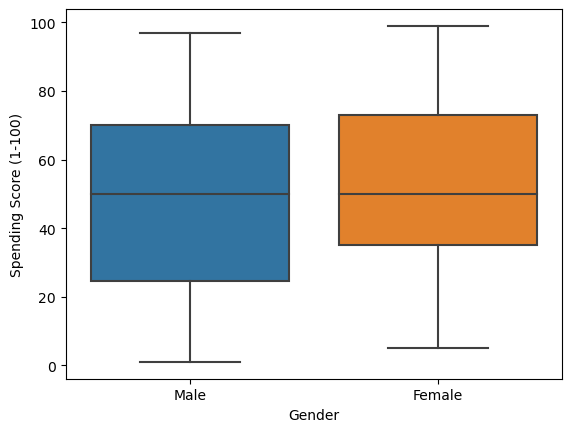

In [9]:
# sns.kdeplot(df['Annual Income (k$)'], shade=True, hue=df['Gender'])
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']

for i in columns:
    plt.figure()
    sns.boxplot(data=df, x='Gender', y=df[i])

In [10]:
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

# Bivariate Analysis

<AxesSubplot: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

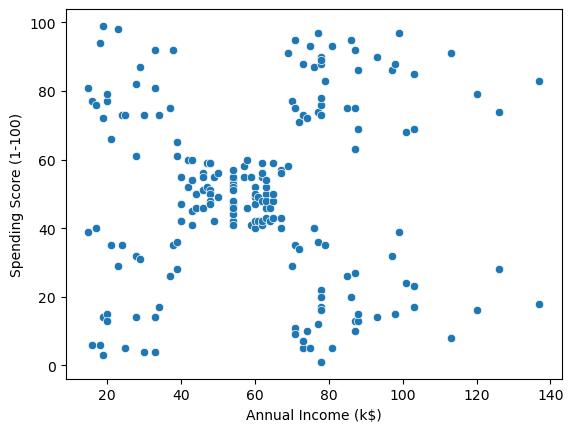

In [11]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')

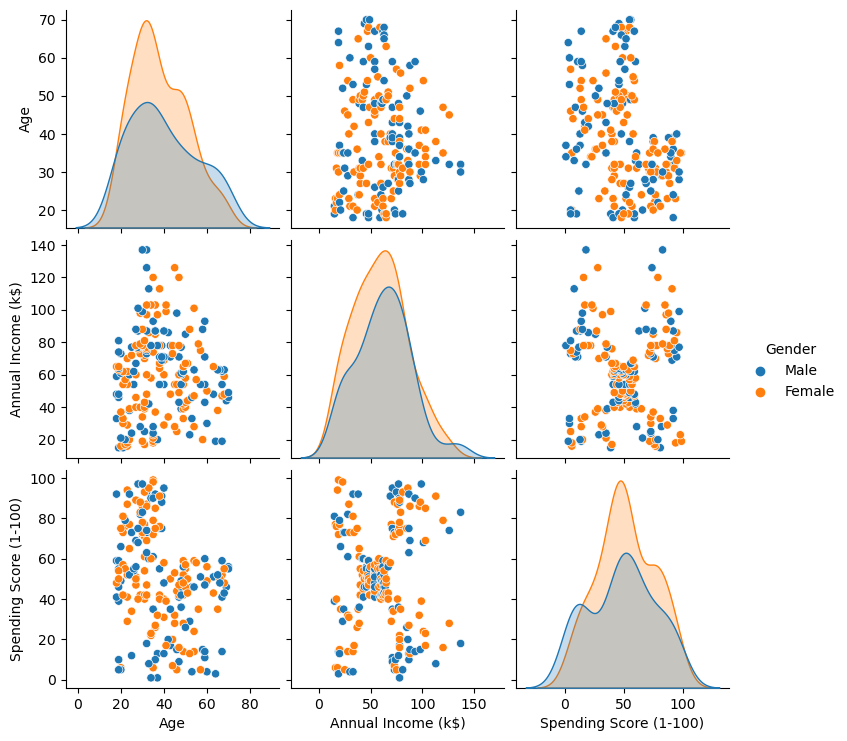

In [12]:
df= df.drop('CustomerID', axis=1)
sns.pairplot(data=df, hue='Gender')

In [13]:
df.groupby(['Gender'])['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [14]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<AxesSubplot: >

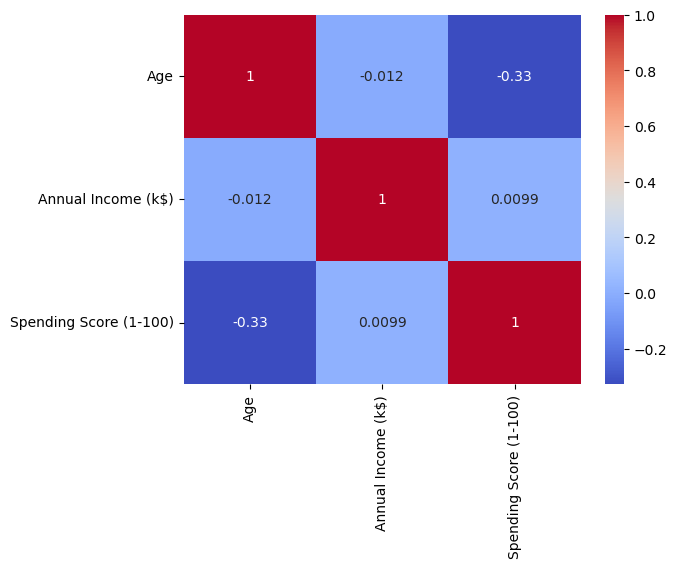

In [15]:
sns.heatmap(df.corr(), annot=True, cmap= 'coolwarm')

# Clustering- Univariate, Bivariate, Multivariate

## Univariate Cluster

In [16]:
cluster1 = KMeans()
# cluster1 = KMeans(n_clusters=6) -- we can change the no. of clusters

In [17]:
cluster1.fit(df[['Annual Income (k$)']]) # by default no.of clusters is 8

KMeans()

In [18]:
cluster1.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 4, 4, 4, 4,
       4, 4])

In [19]:
df['Income Cluster'] = cluster1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,2
3,Female,23,16,77,2
4,Female,31,17,40,2


In [20]:
df['Income Cluster'].value_counts()

5    42
3    36
2    32
0    28
6    26
1    16
7    14
4     6
Name: Income Cluster, dtype: int64

In [21]:
# to find the ideal number of clusters we use ELBOW METHOD
cluster1.inertia_ # represents distance between centroids

2822.4996947496948

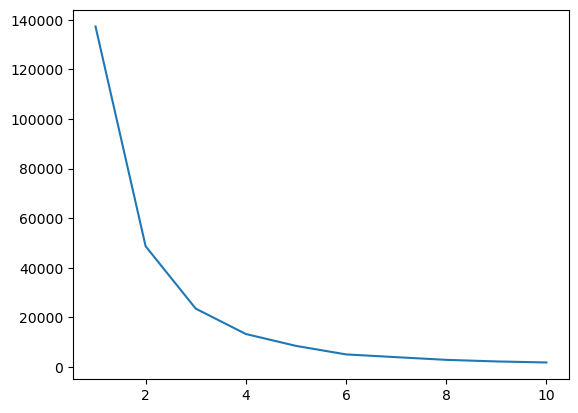

In [22]:
inertia_score= []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_score.append(kmeans.inertia_)
    
plt.plot(range(1,11), inertia_score) # looks like elbow starts at 3

In [23]:
cluster1 = KMeans(n_clusters=3)
cluster1.fit(df[['Annual Income (k$)']])
df['Income Cluster'] = cluster1.labels_
df['Income Cluster'].value_counts()

0    92
1    72
2    36
Name: Income Cluster, dtype: int64

In [24]:
cluster1.inertia_

23528.152173913044

In [25]:
df.groupby('Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,39.184783,66.717391,50.054348
1,38.930556,33.027778,50.166667
2,37.833333,99.888889,50.638889


## Bivariate Cluster

In [26]:
cluster2 = KMeans()
cluster2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] = cluster2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,1,3
1,Male,21,15,81,1,2
2,Female,20,16,6,1,3
3,Female,23,16,77,1,2
4,Female,31,17,40,1,3


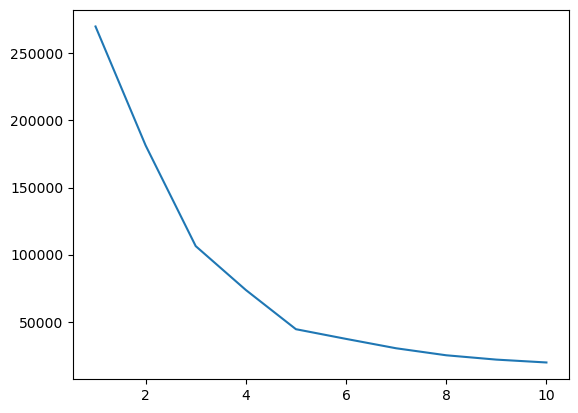

In [27]:
inertia_score2= []
for i in range(1,11):
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_score2.append(kmeans2.inertia_)
    
plt.plot(range(1,11), inertia_score2) # looks like elbow starts at 5

In [28]:
cluster2 = KMeans(n_clusters= 5)
cluster2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] = cluster2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,1,0
1,Male,21,15,81,1,3
2,Female,20,16,6,1,0
3,Female,23,16,77,1,3
4,Female,31,17,40,1,0


In [29]:
# cluster2.cluster_centers_
centres = pd.DataFrame(cluster2.cluster_centers_)
centres.columns = ['x','y']

<AxesSubplot: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

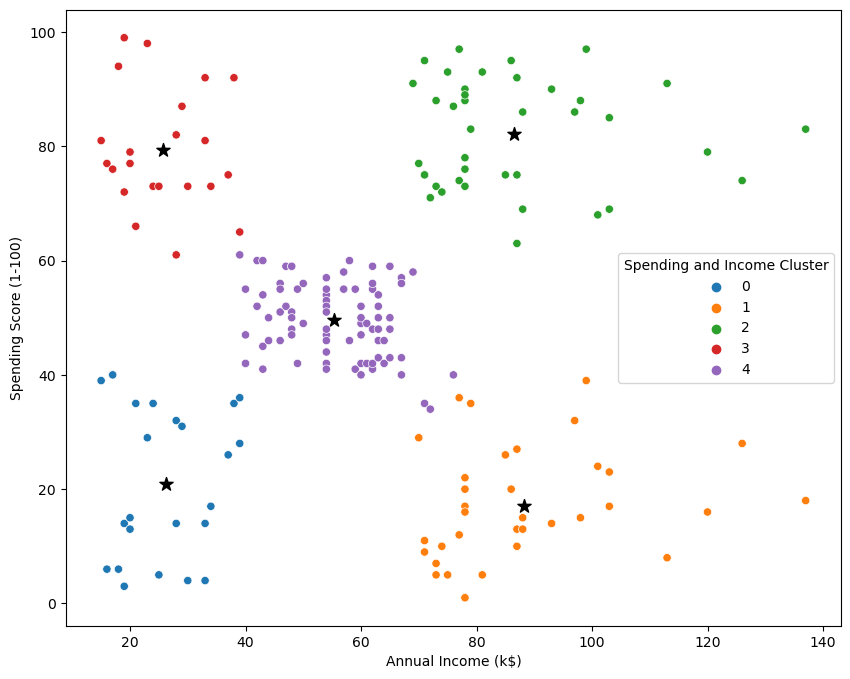

In [30]:
plt.figure(figsize=(10,8))
plt.scatter(x=centres['x'], y=centres['y'], s=100, c='black', marker='*')
sns.scatterplot(data= df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Spending and Income Cluster', palette='tab10')

Cluster 2 has high income and high spending, thus seems to be the optimum target audience to for marketing audience <br>
Cluster 4 can be target for ongoing marketing

In [31]:
# breakdown the cluster by gender
pd.crosstab(df['Spending and Income Cluster'], df['Gender'], normalize='index') 

Gender,Female,Male
Spending and Income Cluster,,
0,0.608696,0.391304
1,0.457143,0.542857
2,0.538462,0.461538
3,0.590909,0.409091
4,0.592593,0.407407


In [32]:
# find average of based in cluster
df.groupby('Spending and Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,45.217391,26.304348,20.913043
1,41.114286,88.200000,17.114286
2,32.692308,86.538462,82.128205
3,25.272727,25.727273,79.363636
4,42.716049,55.296296,49.518519


# Multivariate Cluster

In [33]:
# here we will need pre-processing as entire dataframe is being used
from sklearn.preprocessing import StandardScaler

In [34]:
scale = StandardScaler()

In [35]:
df.head()
# one-hot encoding to convert categorical to numerical for the model to work

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,1,0
1,Male,21,15,81,1,3
2,Female,20,16,6,1,0
3,Female,23,16,77,1,3
4,Female,31,17,40,1,0


In [36]:
df2 = pd.get_dummies(df, drop_first=True)
df2.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,19,15,39,1,0,1
1,21,15,81,1,3,1
2,20,16,6,1,0,0
3,23,16,77,1,3,0
4,31,17,40,1,0,0


In [37]:
df2.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [38]:
df2=df2[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]
df2.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [41]:
df2=pd.DataFrame(scale.fit_transform(df2))
df2.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


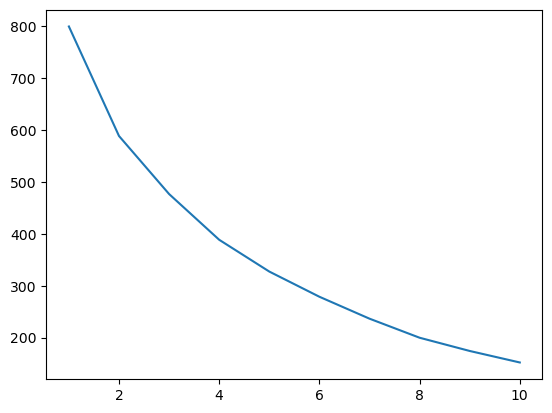

In [43]:
inertia_score3= []
for i in range(1,11):
    kmeans3 = KMeans(n_clusters=i)
    kmeans3.fit(df2)
    inertia_score3.append(kmeans3.inertia_)
    
plt.plot(range(1,11), inertia_score3) # looks like elbow starts at 5

In [ ]:
df.to_csv('Mall_Customers_Clustered.csv')